# Example: Introduction to topsbm

Topic modelling with hierarchical stochastic block models

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from topsbm import TopSBM

## Setup: Load a corpus

1. We have a list of documents, each document contains a list of words.
1. We have a list of document titles (optional)

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).

We use scikit-learn's [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to turn this text into a feature matrix.

In [6]:
# Load texts and vectorize
with open('corpus.txt', 'r') as f:
    docs = f.readlines()

vec = CountVectorizer()
X = vec.fit_transform(docs)

# X is now a sparse matrix of (docs, words)

# titles corresponding to docs
with open('titles.txt', 'r') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [7]:
# view the data for document 0
print(titles[0])
print(docs[0][:100])

Nuclear_Overhauser_effect
 the nuclear overhauser effect noe is the transfer of nuclear spin polarization from one nuclear spi


## Fit the model

Calling `TopSBM.fit_transform` will:
* construct the bipartite graph between documents and words (samples and features)
* perform Hierarchical Stochastic Block Model inference over the graph
* return an embedding of the samples in the block level with finest granularity

In [16]:
model = TopSBM(weighted_edges=False, random_state=8)
Xt = model.fit_transform(X)

## Plotting the graph and block structure

The following plot shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

* document-nodes are on the left
* word-nodes are on the right
* different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

* on the uppermost level, each node belongs to the same group (square in the middle)
* on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
* only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

In the code, the lowest level is known as level 0, with coarser levels 1, 2, ...

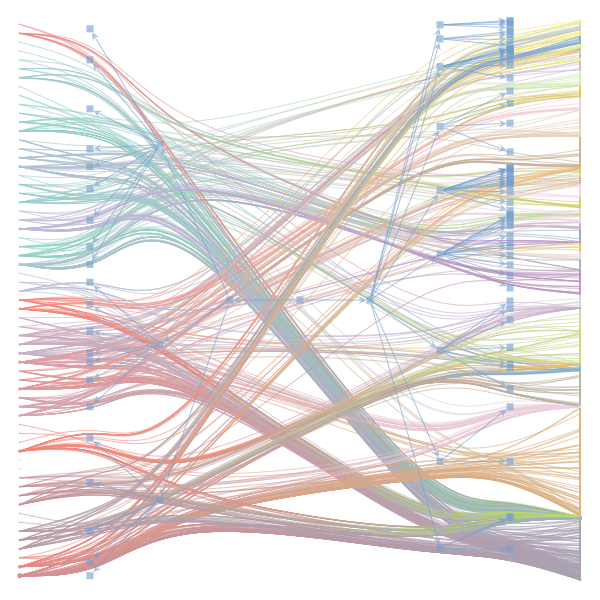

In [17]:
model.plot_graph(None)